<a href="https://colab.research.google.com/github/heejjj/Heart_Attact_Predict/blob/heejjj_edit/Heart_Attack_Analysis_%26_Prediction2_23_04_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# DecisionTreeClassifier를 임포트합니다.
from sklearn.tree import DecisionTreeClassifier

# accuracy_score를 임포트합니다.
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,precision_score)
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.2)



In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")
#import pandas_profiling

In [33]:
import pandas as pd
# heart_disease.csv를 데이터프레임으로 로드합니다.
df = pd.read_csv('/content/drive/MyDrive/kaggle/Heart Attack Analysis & Prediction Dataset/heart.csv')

# 처음 다섯 개 행을 출력합니다.
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df_copy=df.copy()

In [40]:
y= df_copy['output']
x=df_copy.drop(['output'],axis=1)

In [42]:
x_f=df.drop(['output'],axis=1)
y_f= df[['output']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_f,y_f, test_size = 0.2, random_state = 0)

In [46]:
model_xgb = XGBClassifier(random_state = 42)
model_xgb.fit(X_train, y_train)
y_xgb = model_xgb.predict(X_test)
acc_xgb = round(accuracy_score(y_test, y_xgb),4)*100
print("\n\nAccuracy with untuned XGBoost is: " + str(acc_xgb) + " %")



Accuracy with untuned XGBoost is: 78.69 %


In [47]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [49]:
scores = cross_val_score(model_xgb, X, y, cv=kfold)

# 정확도를 출력합니다.
print('정확도:', np.round(scores, 2))

# 정확도 평균을 출력합니다.
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.72 0.82 0.75 0.8  0.82]
정확도 평균: 0.78


In [50]:
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

#교차 검증
scores = cross_val_score(rf,X,y,cv=5)

#정확도 측정
print('정확도 : ',np.round(scores,3))

#정확도 측정
print('정확도의 평균: %0.3f ' %(scores.mean()))

정확도 :  [0.787 0.836 0.77  0.8   0.767]
정확도의 평균: 0.792 


In [67]:
from xgboost.sklearn import XGBRFClassifier
gamma = range(1,15)

avg_score = {}

for gamma in tqdm(gamma):
    
    model = XGBClassifier(gamma= gamma)
    
    avg_score[gamma] = np.mean(cross_val_score(model,X_train,y_train, cv = 5))

100%|██████████| 14/14 [00:12<00:00,  1.14it/s]


Text(0.5, 1.0, 'Best gamma is 4 \n score : 0.84')

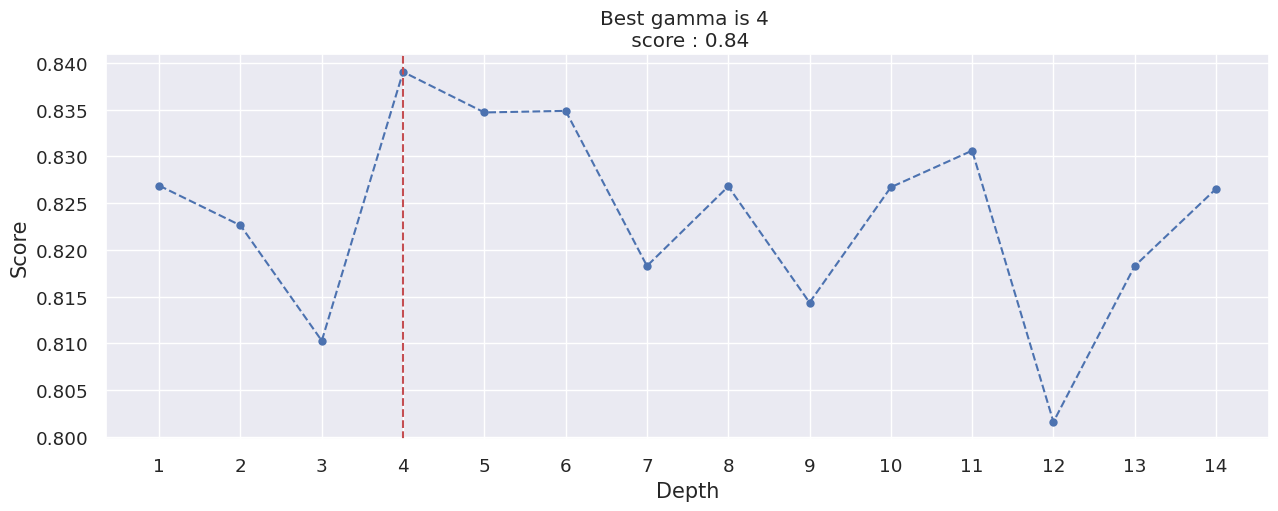

In [68]:
idx = max(avg_score, key = avg_score.get)

plt.figure(figsize = [15,5])
plt.plot(avg_score.keys(), avg_score.values(), marker = 'o', ls = '--')
plt.xticks(ticks = range(1,15))
plt.axvline(idx, ls = '--', c = 'r')
plt.xlabel('Depth', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})
plt.title(f'Best gamma is {idx} \n score : {round(avg_score[idx],2)}')

In [69]:
dephts = range(1,5)

avg_score = {}

for depth in tqdm(dephts):
    
    model = XGBClassifier(max_depth= depth)
    
    avg_score[depth] = np.mean(cross_val_score(model,X_train,y_train, cv = 5))

100%|██████████| 4/4 [00:00<00:00,  4.11it/s]


Text(0.5, 1.0, 'Best gamma is 1 \n score : 0.82')

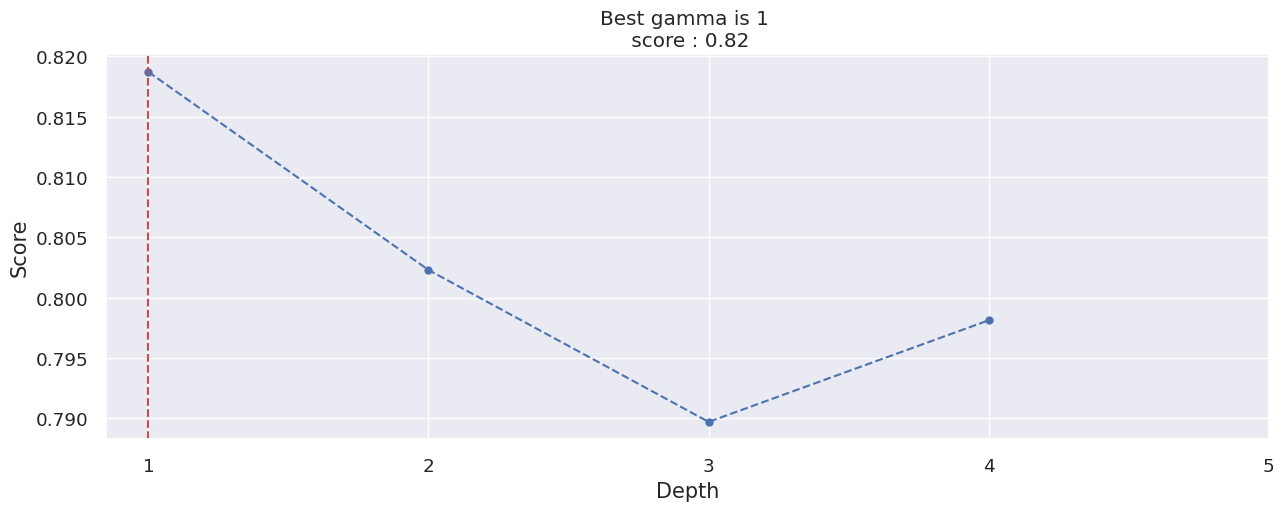

In [70]:
idx = max(avg_score, key = avg_score.get)

plt.figure(figsize = [15,5])
plt.plot(avg_score.keys(), avg_score.values(), marker = 'o', ls = '--')
plt.xticks(ticks = range(1,6))
plt.axvline(idx, ls = '--', c = 'r')
plt.xlabel('Depth', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})
plt.title(f'Best gamma is {idx} \n score : {round(avg_score[idx],2)}')

In [71]:
model_xgb = XGBClassifier(random_state = 42,gamma=4,max_depth=1)
model_xgb.fit(X_train, y_train)
y_xgb = model_xgb.predict(X_test)
acc_xgb = round(accuracy_score(y_test, y_xgb),4)*100
print("\n\nAccuracy with untuned XGBoost is: " + str(acc_xgb) + " %")



Accuracy with untuned XGBoost is: 86.89 %


In [72]:
#교차 검증
scores = cross_val_score(model_xgb,X,y,cv=5)

#정확도 측정
print('정확도 : ',np.round(scores,3))

#정확도 측정
print('정확도의 평균: %0.3f ' %(scores.mean()))

정확도 :  [0.836 0.902 0.82  0.833 0.767]
정확도의 평균: 0.831 
